In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Import data into Python environment.

In [28]:
comcast_consumer_complaints=pd.read_csv('Comcast_telecom_complaints_data.csv')
comcast_consumer_complaints

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No
...,...,...,...,...,...,...,...,...,...,...,...
2219,213550,Service Availability,04-02-15,04-Feb-15,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No
2220,318775,Comcast Monthly Billing for Returned Modem,06-02-15,06-Feb-15,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No
2221,331188,complaint about comcast,06-09-15,06-Sep-15,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No
2222,360489,Extremely unsatisfied Comcast customer,23-06-15,23-Jun-15,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No


In [46]:
comcast_consumer_complaints['month_number']=pd.to_datetime(comcast_consumer_complaints['Date_month_year']).dt.month
comcast_consumer_complaints['month_number']

0       4
1       8
2       4
3       7
4       5
       ..
2219    2
2220    2
2221    9
2222    6
2223    6
Name: month_number, Length: 2224, dtype: int64

<AxesSubplot:xlabel='month_number'>

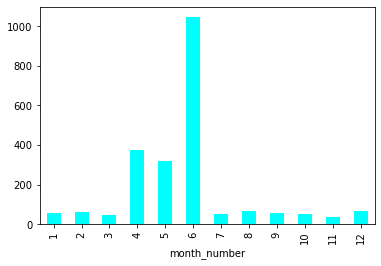

In [30]:
Count_complaints=comcast_consumer_complaints.groupby(['month_number'])['Customer Complaint'].count()
Count_complaints
Count_complaints.plot(kind='bar',color='cyan')

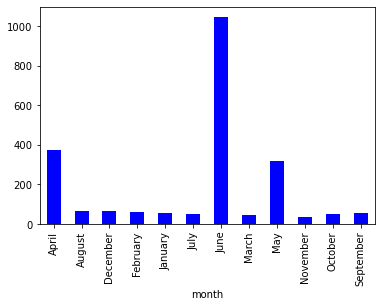

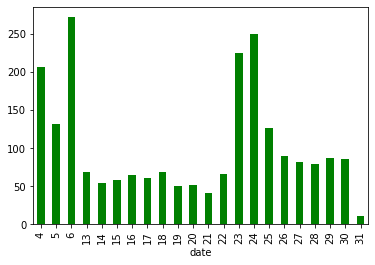

In [31]:
# - Provide the trend chart for the number of complaints at monthly and daily granularity levels.
comcast_consumer_complaints['month']=pd.to_datetime(comcast_consumer_complaints['Date_month_year']).dt.month_name()
comcast_consumer_complaints['month']
comcast_consumer_complaints['date']=pd.to_datetime(comcast_consumer_complaints['Date_month_year']).dt.day
comcast_consumer_complaints['date']
comcast_consumer_complaints.groupby(['month'])['Customer Complaint'].count().plot(kind='bar',color='blue')
plt.show()
comcast_consumer_complaints.groupby(['date'])['Customer Complaint'].count().plot(kind='bar',color='green')
plt.show()

In [32]:
# Provide a table with the frequency of complaint types
comcast_consumer_complaints['Customer Complaint'].value_counts().to_frame().reset_index()

,index,Customer Complaint
0,Comcast,83
1,Comcast Internet,18
2,Comcast Data Cap,17
3,comcast,13
4,Comcast Billing,11
...,...,...
1836,Inability to get access to internet through Co...,1
1837,"Comcast Forcing me to purchase cable tv, only ...",1
1838,throttling,1
1839,ComCast continues to bill me though I canceled...,1


In [33]:
# Which complaint types are maximum i.e., around internet, network issues, or across any other domains.
comcast_consumer_complaints['Customer Complaint'].value_counts().head()


Comcast             83
Comcast Internet    18
Comcast Data Cap    17
comcast             13
Comcast Billing     11
Name: Customer Complaint, dtype: int64

In [34]:
# Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed
comcast_consumer_complaints['Status']=comcast_consumer_complaints['Status'].apply(lambda x: 'Open' if ((x=='Open') | (x=='Pending')) else 'Closed' )
comcast_consumer_complaints['Status']

0       Closed
1       Closed
2       Closed
3         Open
4       Closed
         ...  
2219    Closed
2220    Closed
2221    Closed
2222    Closed
2223      Open
Name: Status, Length: 2224, dtype: object

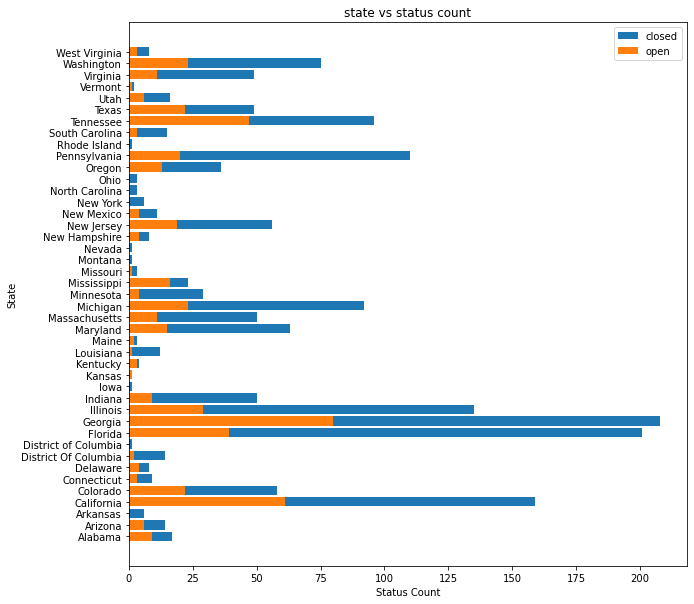

In [35]:
# Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3.

status_open=comcast_consumer_complaints[comcast_consumer_complaints['Status']=='Open'].groupby(['State'])['Status'].count().to_frame().reset_index()
status_close=comcast_consumer_complaints[comcast_consumer_complaints['Status']=='Closed'].groupby(['State'])['Status'].count().to_frame().reset_index()

fig=plt.figure(figsize=(10,10))
plt.barh(status_close.State, status_close.Status)
plt.barh(status_open.State, status_open.Status)

plt.ylabel("State", size=10)
plt.xlabel("Status Count")
plt.legend(["closed", "open"])
plt.title("state vs status count")
plt.show()

In [44]:
status_close=comcast_consumer_complaints[comcast_consumer_complaints['Status']=='Closed'].groupby(['State'])['Status'].count().to_frame().reset_index()
status_close

,State,Status
0,Alabama,17
1,Arizona,14
2,Arkansas,6
3,California,159
4,Colorado,58
5,Connecticut,9
6,Delaware,8
7,District Of Columbia,14
8,District of Columbia,1
9,Florida,201


In [36]:
# Which state has the maximum complaints
# Georgia-----from the bar chart
complaint_statewise=comcast_consumer_complaints.groupby(['State'])['Customer Complaint'].count()
complaint_statewise


State
Alabama                  26
Arizona                  20
Arkansas                  6
California              220
Colorado                 80
Connecticut              12
Delaware                 12
District Of Columbia     16
District of Columbia      1
Florida                 240
Georgia                 288
Illinois                164
Indiana                  59
Iowa                      1
Kansas                    2
Kentucky                  7
Louisiana                13
Maine                     5
Maryland                 78
Massachusetts            61
Michigan                115
Minnesota                33
Mississippi              39
Missouri                  4
Montana                   1
Nevada                    1
New Hampshire            12
New Jersey               75
New Mexico               15
New York                  6
North Carolina            3
Ohio                      3
Oregon                   49
Pennsylvania            130
Rhode Island              1
South Carolina

In [39]:
# Which state has the highest percentage of unresolved complaints
np.where(status_open.Status==status_open.Status.max())
status_open.iloc[8]

State     Georgia
Status         80
Name: 8, dtype: object

In [45]:
# Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.
comcast_consumer_complaints[comcast_consumer_complaints['Status']=='Closed'].groupby('Status')['Received Via'].value_counts(normalize=True)*100

Status  Received Via      
Closed  Customer Care Call    50.615114
        Internet              49.384886
Name: Received Via, dtype: float64